# NLP TOPIC MODELLING OF BBC ARTICLES - USING UNSUPERVISED LATENT DIRICHLET ALLOCATION (LDA) GENERATIVE MODEL

## Importing the Python Pandas Library

In [1]:
import pandas as pd

print("Import Completed")

Import Completed


In [2]:
# Mounting the Google Drive to Import the Data 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the BBC Articles CSV File Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/NLP_Topic_Modelling_of_BBC_Articles_using_Unsupervised_Latent Dirichlet Allocation_LDA_Model/data/bbc_articles_2018.csv")

print("Data Import Completed")

Data Import Completed


## Data Exploration

In [4]:
# Verifying the shape of the Data

data.shape

(309, 2)

In [5]:
# Verifying the First 5 Rows of Data Instances

data.head()

,articles,lang
0,Image copyright PA/EPA Image caption Oligarch ...,en
1,Husband admits killing French jogger\r\n\r\nTh...,en
2,Media playback is unsupported on your device M...,en
3,Manchester City's Leroy Sane is ruled out for ...,en
4,Image copyright AFP Image caption Sebastien Br...,en


In [6]:
# Verifying the Last 5 Rows of Data Instances

data.tail()

,articles,lang
304,فيديو\r\n\r\nكيف تعبر الحدود...مثل الفيل؟!\r\n...,ar
305,بالصور\r\n\r\nمعالم لندن تحت الأضواء\r\n\r\nمع...,ar
306,يقدم لكم تلفزيون بي بي سي العربي الأخبار والأخ...,ar
307,موجات FM\r\n\r\nنبث إرسالنا على موجات إف إم في...,ar
308,Hi I am the head of product for BBC News Onlin...,en


In [25]:
# Displaying the Contents of the First Article

data.iloc[0][0]

'Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list\r\n\r\nRussian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.\r\n\r\nThe list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.\r\n\r\nHowever, the US stressed those named were not subject to new sanctions.\r\n\r\nMr Putin said the list was an unfriendly act that complicated US-Russia ties but he said he did not want to escalate the situation.\r\n\r\nMr Putin said Russia should instead be thinking about "ourselves and the economy".\r\n\r\nThe list was also derided by a number of senior Russian officials who said it bore a strong resemblance to the Forbes magazine ranking of Russian billionaires. A US Treasury Department later told Buzzfeed that an unclassified annex of the report had been derived from the magazine.\r\n\r\

### As we can see from the above results; there are a total of 309 BBC articles with 2 attributes namely 'articles' containing the article content in the text format and 'lang' that denotes the language of the article.

## Data Cleaning

In [7]:
# Removal of the Blank Articles

data = data.dropna().reset_index(drop=True)

print("Execution Completed")

Execution Completed


In [8]:
# Re-verifying the shape of the Data after cleaning the articles with missing information

data.shape

(308, 2)

### As we can see from the above results; there is only one row of article data with missing information.

## Retaining only the English articles for our modellling purposes

In [13]:
from langdetect import detect
from tqdm import tqdm_notebook

tqdm_notebook().pandas()

print("Execution Completed")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


0it [00:00, ?it/s]

Execution Completed


In [14]:
data['lang'] = data.articles.progress_map(detect)

# Verifying the First 5 Rows of Data Instances
data.head()

  0%|          | 0/308 [00:00<?, ?it/s]

,articles,lang
0,Image copyright PA/EPA Image caption Oligarch ...,en
1,Husband admits killing French jogger\r\n\r\nTh...,en
2,Media playback is unsupported on your device M...,en
3,Manchester City's Leroy Sane is ruled out for ...,en
4,Image copyright AFP Image caption Sebastien Br...,en


In [15]:
# Displaying the Count of the Articles Based on the Individual Languages

data.lang.value_counts()

en    256
fa      9
fr      8
id      5
uk      4
ru      4
vi      4
hi      4
ar      4
sw      3
pt      2
es      2
tr      2
de      1
Name: lang, dtype: int64

In [16]:
# Keeping Only the English Language Articles

data_english = data.loc[data.lang=='en']

data_english

,articles,lang
0,Image copyright PA/EPA Image caption Oligarch ...,en
1,Husband admits killing French jogger\r\n\r\nTh...,en
2,Media playback is unsupported on your device M...,en
3,Manchester City's Leroy Sane is ruled out for ...,en
4,Image copyright AFP Image caption Sebastien Br...,en
...,...,...
299,Image copyright Getty Images Image caption Cou...,en
300,"The key piece of advice: ""Do the writing. Writ...",en
301,Image copyright NASA Image caption Nasa develo...,en
302,To coincide with the Writersroom comedy submis...,en


## Tokenisation

### Splitting Each Article in to Sentences

In [18]:
# Importing the Python's Sentence Tokenizer Function

from nltk.tokenize import sent_tokenize

print("Import Completed")

Import Completed


In [20]:
# Importing the nltk library and Downloading the 'punkt' package

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Tokenising the Articles and Displaying the First 5 Sentences

data_english['sentences'] = data_english.articles.progress_map(sent_tokenize)

# Printing the First 5 Sentences of the List Article
data_english['sentences'].head(1).tolist()[0][:5] 

  0%|          | 0/256 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list\r\n\r\nRussian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.',
 'The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.',
 'However, the US stressed those named were not subject to new sanctions.',
 'Mr Putin said the list was an unfriendly act that complicated US-Russia ties but he said he did not want to escalate the situation.',
 'Mr Putin said Russia should instead be thinking about "ourselves and the economy".']

In [ ]:
# Viewing the Updated DataFrame after Tokenising the Articles into Sentences

data_english

### Splitting Each Sentences in to Individual Words

In [28]:
# Importing the Python's Words Tokenizer Function

from nltk.tokenize import word_tokenize

print("Import Completed")

Import Completed


In [29]:
# Tokenising the Sentences and Displaying the Words of the First 5 Sentences

data_english['tokens_sentences'] = data_english['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])

# Printing the Words of the First 5 Sentences
print(data_english['tokens_sentences'].head(1).tolist()[0][:5])

  0%|          | 0/256 [00:00<?, ?it/s]

[['Image', 'copyright', 'PA/EPA', 'Image', 'caption', 'Oligarch', 'Roman', 'Abramovich', '(', 'l', ')', 'and', 'PM', 'Dmitry', 'Medvedev', 'are', 'on', 'the', 'list', 'Russian', 'President', 'Vladimir', 'Putin', 'says', 'a', 'list', 'of', 'officials', 'and', 'businessmen', 'close', 'to', 'the', 'Kremlin', 'published', 'by', 'the', 'US', 'has', 'in', 'effect', 'targeted', 'all', 'Russian', 'people', '.'], ['The', 'list', 'names', '210', 'top', 'Russians', 'as', 'part', 'of', 'a', 'sanctions', 'law', 'aimed', 'at', 'punishing', 'Moscow', 'for', 'meddling', 'in', 'the', 'US', 'election', '.'], ['However', ',', 'the', 'US', 'stressed', 'those', 'named', 'were', 'not', 'subject', 'to', 'new', 'sanctions', '.'], ['Mr', 'Putin', 'said', 'the', 'list', 'was', 'an', 'unfriendly', 'act', 'that', 'complicated', 'US-Russia', 'ties', 'but', 'he', 'said', 'he', 'did', 'not', 'want', 'to', 'escalate', 'the', 'situation', '.'], ['Mr', 'Putin', 'said', 'Russia', 'should', 'instead', 'be', 'thinking', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Viewing the Updated DataFrame after Tokenising the Sentences into Words

data_english

## Lemmatizing With POS Tagging

In [30]:
# Importing the pos tag function

from nltk import pos_tag

print("Execution Completed")

Execution Completed


In [32]:
# Downloading the 'averaged_perceptron_tagger' Package from the nltk Library for POS Tagging

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [33]:
# Executing the Pos Tagging for all the Articles Words

data_english['POS_tokens'] = data_english['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])

# Printing the POS Tagging Mapping Results for the 
print(data_english['POS_tokens'].head(1).tolist()[0][:5])

  0%|          | 0/256 [00:00<?, ?it/s]

[[('Image', 'NN'), ('copyright', 'NN'), ('PA/EPA', 'NNP'), ('Image', 'NNP'), ('caption', 'NN'), ('Oligarch', 'NNP'), ('Roman', 'NNP'), ('Abramovich', 'NNP'), ('(', '('), ('l', 'NN'), (')', ')'), ('and', 'CC'), ('PM', 'NNP'), ('Dmitry', 'NNP'), ('Medvedev', 'NNP'), ('are', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('list', 'NN'), ('Russian', 'NNP'), ('President', 'NNP'), ('Vladimir', 'NNP'), ('Putin', 'NNP'), ('says', 'VBZ'), ('a', 'DT'), ('list', 'NN'), ('of', 'IN'), ('officials', 'NNS'), ('and', 'CC'), ('businessmen', 'NNS'), ('close', 'RB'), ('to', 'TO'), ('the', 'DT'), ('Kremlin', 'NNP'), ('published', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('has', 'VBZ'), ('in', 'IN'), ('effect', 'NN'), ('targeted', 'VBN'), ('all', 'DT'), ('Russian', 'JJ'), ('people', 'NNS'), ('.', '.')], [('The', 'DT'), ('list', 'NN'), ('names', 'RB'), ('210', 'CD'), ('top', 'JJ'), ('Russians', 'NNPS'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sanctions', 'NNS'), ('law', 'NN'), ('aimed', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Defining the Lemmatization Rules


# Inspired from the Internet Source - https://stackoverflow.com/a/15590384

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("Execution Completed")

Execution Completed


In [37]:
# Downloading the 'wordnet' Package from the nltk Library

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
# Lemmatizing Each Word with its POS Tag, in Each Sentence

data_english['tokens_sentences_lemmatized'] = data_english['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

print("Execution Completed")

  0%|          | 0/256 [00:00<?, ?it/s]

Execution Completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
# Viewing the Updated DataFrame after Lemmatization

data_english

,articles,lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),...","[[Image, copyright, PA/EPA, Image, caption, Ol..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th...","[[(Husband, NNP), (admits, VBZ), (killing, VBG...","[[Husband, admit, kill, French, jogger, Three,..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ...","[[(Media, NNP), (playback, NN), (is, VBZ), (un...","[[Media, playback, be, unsupported, on, your, ..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled...","[[(Manchester, NNP), (City, NNP), ('s, POS), (...","[[Manchester, City, 's, Leroy, Sane, be, rule,..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas...","[[(Image, NN), (copyright, NN), (AFP, NNP), (I...","[[Image, copyright, AFP, Image, caption, Sebas..."
...,...,...,...,...,...,...
299,Image copyright Getty Images Image caption Cou...,en,[Image copyright Getty Images Image caption Co...,"[[Image, copyright, Getty, Images, Image, capt...","[[(Image, NN), (copyright, VBD), (Getty, NNP),...","[[Image, copyright, Getty, Images, Image, capt..."
300,"The key piece of advice: ""Do the writing. Writ...",en,"[The key piece of advice: ""Do the writing., Wr...","[[The, key, piece, of, advice, :, ``, Do, the,...","[[(The, DT), (key, JJ), (piece, NN), (of, IN),...","[[The, key, piece, of, advice, :, ``, Do, the,..."
301,Image copyright NASA Image caption Nasa develo...,en,[Image copyright NASA Image caption Nasa devel...,"[[Image, copyright, NASA, Image, caption, Nasa...","[[(Image, NN), (copyright, NN), (NASA, NNP), (...","[[Image, copyright, NASA, Image, caption, Nasa..."
302,To coincide with the Writersroom comedy submis...,en,[To coincide with the Writersroom comedy submi...,"[[To, coincide, with, the, Writersroom, comedy...","[[(To, TO), (coincide, VB), (with, IN), (the, ...","[[To, coincide, with, the, Writersroom, comedy..."


In [41]:
# Viewing the Lemmatized Data for the First 5 Sentences

data_english['tokens_sentences_lemmatized'].head(1).tolist()[0][:5]

[['Image',
  'copyright',
  'PA/EPA',
  'Image',
  'caption',
  'Oligarch',
  'Roman',
  'Abramovich',
  '(',
  'l',
  ')',
  'and',
  'PM',
  'Dmitry',
  'Medvedev',
  'be',
  'on',
  'the',
  'list',
  'Russian',
  'President',
  'Vladimir',
  'Putin',
  'say',
  'a',
  'list',
  'of',
  'official',
  'and',
  'businessmen',
  'close',
  'to',
  'the',
  'Kremlin',
  'publish',
  'by',
  'the',
  'US',
  'have',
  'in',
  'effect',
  'target',
  'all',
  'Russian',
  'people',
  '.'],
 ['The',
  'list',
  'names',
  '210',
  'top',
  'Russians',
  'as',
  'part',
  'of',
  'a',
  'sanction',
  'law',
  'aim',
  'at',
  'punish',
  'Moscow',
  'for',
  'meddle',
  'in',
  'the',
  'US',
  'election',
  '.'],
 ['However',
  ',',
  'the',
  'US',
  'stress',
  'those',
  'name',
  'be',
  'not',
  'subject',
  'to',
  'new',
  'sanction',
  '.'],
 ['Mr',
  'Putin',
  'say',
  'the',
  'list',
  'be',
  'an',
  'unfriendly',
  'act',
  'that',
  'complicate',
  'US-Russia',
  'tie',
  'b

## Re-grouping of the Tokens and Removal of the Stop Words

In [45]:
# Downloading the Stop Words Package from the nltk library

import nltk
nltk.download('stopwords')

print("Execution Completed")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Execution Completed


In [47]:
from nltk.corpus import stopwords

stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']

my_stopwords = stopwords.words('english') + stopwords_verbs + stopwords_other

print(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
# Flattening The List of Sentences of Tokens into a List of Tokens

from itertools import chain

data_english['tokens'] = data_english['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data_english['tokens'] = data_english['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

print("Execution Completed")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Execution Completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
# Viewing the Updated DataFrame after Flattening

data_english

,articles,lang,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),...","[[Image, copyright, PA/EPA, Image, caption, Ol...","[oligarch, roman, abramovich, pm, dmitry, medv..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th...","[[(Husband, NNP), (admits, VBZ), (killing, VBG...","[[Husband, admit, kill, French, jogger, Three,...","[husband, admit, kill, french, jogger, three, ..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ...","[[(Media, NNP), (playback, NN), (is, VBZ), (un...","[[Media, playback, be, unsupported, on, your, ...","[media, playback, unsupported, device, media, ..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled...","[[(Manchester, NNP), (City, NNP), ('s, POS), (...","[[Manchester, City, 's, Leroy, Sane, be, rule,...","[manchester, city, leroy, sane, rule, six, sev..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas...","[[(Image, NN), (copyright, NN), (AFP, NNP), (I...","[[Image, copyright, AFP, Image, caption, Sebas...","[afp, sebastien, bras, famed, restaurant, fath..."
...,...,...,...,...,...,...,...
299,Image copyright Getty Images Image caption Cou...,en,[Image copyright Getty Images Image caption Co...,"[[Image, copyright, Getty, Images, Image, capt...","[[(Image, NN), (copyright, VBD), (Getty, NNP),...","[[Image, copyright, Getty, Images, Image, capt...","[images, could, robot, harm, human, writer, is..."
300,"The key piece of advice: ""Do the writing. Writ...",en,"[The key piece of advice: ""Do the writing., Wr...","[[The, key, piece, of, advice, :, ``, Do, the,...","[[(The, DT), (key, JJ), (piece, NN), (of, IN),...","[[The, key, piece, of, advice, :, ``, Do, the,...","[key, piece, advice, writing, write, lot, unst..."
301,Image copyright NASA Image caption Nasa develo...,en,[Image copyright NASA Image caption Nasa devel...,"[[Image, copyright, NASA, Image, caption, Nasa...","[[(Image, NN), (copyright, NN), (NASA, NNP), (...","[[Image, copyright, NASA, Image, caption, Nasa...","[nasa, nasa, develop, design, computer, long, ..."
302,To coincide with the Writersroom comedy submis...,en,[To coincide with the Writersroom comedy submi...,"[[To, coincide, with, the, Writersroom, comedy...","[[(To, TO), (coincide, VB), (with, IN), (the, ...","[[To, coincide, with, the, Writersroom, comedy...","[coincide, writersroom, comedy, submission, wi..."


In [52]:
# Displaying the Tokens Column of the DataFrame after Flattening

data_english['tokens'].head(1).tolist()[0][:30]

['oligarch',
 'roman',
 'abramovich',
 'pm',
 'dmitry',
 'medvedev',
 'list',
 'russian',
 'president',
 'vladimir',
 'putin',
 'list',
 'official',
 'businessmen',
 'close',
 'kremlin',
 'publish',
 'us',
 'effect',
 'target',
 'russian',
 'people',
 'list',
 'names',
 'top',
 'russians',
 'part',
 'sanction',
 'law',
 'aim']

## Unsupervised Latent Dirichlet Allocation (LDA) Generative Statistical Model

## LDA - Data Preparartion

### Preparing Bi-Grams and Tri-Grams

In [53]:
from gensim.models import Phrases

print("Import Completed")

Import Completed


In [57]:
tokens = data_english['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

tokens

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['oligarch',
  'roman_abramovich',
  'pm_dmitry',
  'medvedev_list',
  'russian_president',
  'vladimir_putin',
  'list',
  'official',
  'businessmen',
  'close',
  'kremlin',
  'publish',
  'us',
  'effect',
  'target',
  'russian',
  'people',
  'list',
  'names',
  'top',
  'russians',
  'part_sanction',
  'law_aim',
  'punish_moscow',
  'meddle_us',
  'election',
  'however',
  'us_stress',
  'name',
  'subject',
  'new_sanction',
  'putin_list',
  'unfriendly_act',
  'complicate',
  'tie',
  'escalate',
  'situation',
  'putin',
  'russia',
  'instead',
  'think',
  'economy',
  'list',
  'deride',
  'number',
  'senior_russian',
  'official',
  'bore',
  'strong',
  'resemblance',
  'forbes',
  'magazine',
  'ranking',
  'russian',
  'billionaire',
  'us_treasury_department',
  'later',
  'tell',
  'buzzfeed',
  'unclassified',
  'annex',
  'report',
  'derive',
  'magazine',
  'us_publish',
  'list',
  'government_require',
  'draw_list',
  'congress_pass',
  'countering_ameri

### Preparing Objects for the LDA Gensim Implementation

In [58]:
from gensim import corpora

print("Execution Completed")

Execution Completed


In [59]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 9),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 5),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 3),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1)],
 [(77, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1)],
 [(2, 2)

## Execution of the LDA Model

In [60]:
from gensim import models
import numpy as np

print("Import Completed")

Import Completed


In [61]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

print("Execution Completed")

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 1.6 s, sys: 616 µs, total: 1.6 s
Wall time: 1.61 s
Execution Completed


## Exploration of the LDA Model Results

### Review of the Topics

In [63]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

print("Execution Completed")

0: 0.010*"animal" + 0.009*"specie" + 0.009*"help" + 0.007*"night" + 0.007*"find" + 0.007*"day" + 0.006*"part" + 0.006*"light" + 0.006*"predator" + 0.006*"act" + 0.005*"transparent" + 0.005*"however" + 0.005*"us" + 0.005*"area" + 0.005*"drug" + 0.005*"team" + 0.005*"release" + 0.005*"water" + 0.005*"local" + 0.005*"fish"

1: 0.016*"images" + 0.011*"customer" + 0.009*"star" + 0.008*"moment" + 0.007*"night" + 0.007*"time" + 0.007*"add" + 0.007*"give" + 0.007*"show" + 0.006*"woman" + 0.006*"year" + 0.006*"reuters" + 0.006*"call" + 0.006*"event" + 0.005*"performance" + 0.005*"prize" + 0.005*"home" + 0.005*"supermarket" + 0.004*"another" + 0.004*"could"

2: 0.006*"us" + 0.006*"work" + 0.005*"people" + 0.005*"first" + 0.005*"time" + 0.005*"year" + 0.004*"city" + 0.004*"show" + 0.004*"back" + 0.004*"become" + 0.004*"home" + 0.004*"restaurant" + 0.004*"part" + 0.004*"tunnel" + 0.004*"run" + 0.004*"old" + 0.004*"could" + 0.004*"dish" + 0.004*"find" + 0.004*"bring"

3: 0.014*"separatist" + 0.011*

### Allocation of the Topics to the Documents

In [69]:
print(data_english.articles.loc[0][:500])

Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list

Russian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.

The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.

However, the US stressed those named were not subject to new sanctions.

Mr Putin said the list was an unfr


In [75]:
lda_model[corpus[0]]

[(8, 0.15980305), (9, 0.011235468), (11, 0.087089226), (16, 0.74044627)]

## Prediction of the Topics on the Unseen Documents/Articles

In [80]:
test_document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 
Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.
But that didn't matter.
While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.
Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''

tokens = word_tokenize(test_document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])


,topic #,weight,words in topic
0,2,0.21,"0.006*""us"" + 0.006*""work"" + 0.005*""people"" + 0..."
1,4,0.09,"0.007*""people"" + 0.006*""wave"" + 0.005*""benefit..."
2,8,0.42,"0.008*""us"" + 0.007*""could"" + 0.006*""people"" + ..."
3,12,0.11,"0.016*""work"" + 0.012*""people"" + 0.009*""call"" +..."
4,15,0.17,"0.013*""could"" + 0.010*""call"" + 0.010*""base"" + ..."


## Advanced Exploration of the LDA Model Results

## Allocation of the Topics in all the Documents/Articles



In [82]:
topics = [lda_model[corpus[i]] for i in range(len(data_english))]

topics

[[(8, 0.1598211), (9, 0.011235386), (11, 0.08708451), (16, 0.740433)],
 [(2, 0.13858446), (10, 0.8394643)],
 [(8, 0.24613425), (10, 0.752756)],
 [(11, 0.9736111)],
 [(2, 0.9990216)],
 [(14, 0.99689543)],
 [(15, 0.9793479)],
 [(16, 0.9736111)],
 [(2, 0.18834534),
  (5, 0.0620583),
  (12, 0.5563042),
  (14, 0.11143295),
  (16, 0.081291415)],
 [(8, 0.9982914)],
 [(12, 0.9793479)],
 [(2, 0.999001)],
 [(17, 0.9634615)],
 [(11, 0.9547619)],
 [(4, 0.9910377)],
 [(13, 0.9967906)],
 [(4, 0.35292462), (14, 0.64654636)],
 [(2, 0.9429002), (13, 0.056477454)],
 [(12, 0.99918526)],
 [(11, 0.99898505)],
 [(12, 0.99869144)],
 [(2, 0.70625407), (16, 0.29048505)],
 [(10, 0.99796134)],
 [(11, 0.076673776), (14, 0.92159873)],
 [(13, 0.9547619)],
 [(12, 0.44663388), (14, 0.53571904)],
 [(15, 0.99949497)],
 [(13, 0.31577638), (16, 0.6279736)],
 [(2, 0.6068313), (8, 0.38398075)],
 [(9, 0.9866198)],
 [(4, 0.9856061)],
 [(4, 0.9693548)],
 [(19, 0.990594)],
 [(16, 0.98442626)],
 [(7, 0.9768293)],
 [(8, 0.969354

In [83]:
# Custom Function to Allocate Topics to all the Documents/Articles

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [85]:
# Similar to the TF-IDF Approach; Creating a Matrix of Topic Weighting, with Documents/Articles as Rows and Topics as Columns

document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

print("Execution Completed")

Execution Completed


In [86]:
# Viewing the First 5 Instances of the Document Topics

document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.159821,0.011235,0.000000,0.087085,0.0,0.0,0.0,0.0,0.740433,0.0,0.0,0.0
1,0.0,0.0,0.138584,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.839464,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.246134,0.000000,0.752756,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.973611,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.999022,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [90]:
# Sorting and Displaying the List of 20 Documents/Articles that belong to the Topic 8

document_topic.sort_values(8, ascending=False)[8].head(20)

166    0.999302
59     0.998957
77     0.998768
9      0.998291
252    0.997214
41     0.993015
39     0.990594
230    0.989560
42     0.987500
69     0.986620
195    0.984426
121    0.984426
153    0.979348
35     0.969355
201    0.969355
249    0.963462
167    0.884578
129    0.620134
187    0.577762
97     0.562918
Name: 8, dtype: float64

In [91]:
# Sorting and Displaying the List of 20 Documents/Articles that belong to the Topic 15

document_topic.sort_values(15, ascending=False)[15].head(20)

26     0.999495
213    0.983036
223    0.981373
139    0.979348
180    0.979348
6      0.979348
105    0.610644
102    0.579573
106    0.495697
149    0.350721
248    0.325643
235    0.247909
183    0.167725
122    0.050000
123    0.050000
124    0.050000
167    0.000000
165    0.000000
166    0.000000
164    0.000000
Name: 15, dtype: float64

In [95]:
# Displaying the 100th Document/Article to Show the First 1000 Words

print(data_english.articles.loc[99][:1000])

Image copyright Reuters Image caption Congress passed the law in August, although President Donald Trump had opposed it

The US has published a list of 114 Russian politicians and 96 oligarchs, some close to the president, as part of a sanctions law aimed at punishing Russia for meddling in the US election.

The US stressed those named had not been hit with new sanctions, although some have already been targeted.

Congress passed the sanctions law in August. President Donald Trump signed it while making his reservations clear.

The Kremlin said the list could damage the reputation of those named.

Why has the US published the list?

The government was required to draw up the list after Congress passed the Countering America's Adversaries Through Sanctions Act (Caatsa) in August.

The law aimed to punish Russia for its alleged meddling in the 2016 US elections and its actions in Ukraine.

Congress wanted the list to name and shame those who had benefited from close assoc


## Visualising the Distribution of the Topics in all the Documents/Articles

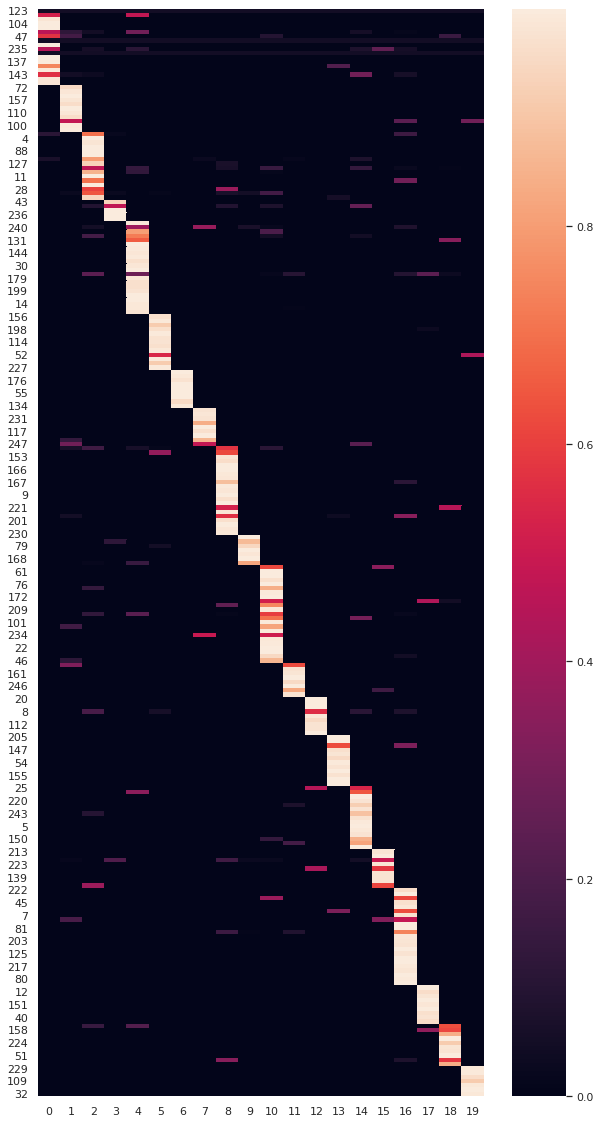

In [96]:
# Heat Map

%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

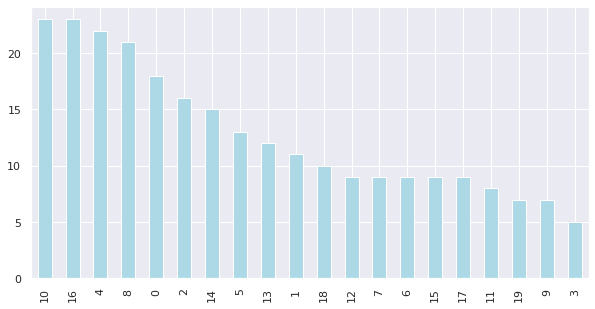

In [97]:
# Bar Chart

sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

## Visualising the Topics

### Reference: https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf

### Here is a Short Legend to Explain the Visualisation:
> ### Size of The Bubble: Proportional to the Proportions of the Topics across the N Total Tokens in the Corpus
> ### Red Bars: Estimated Number of Times a Given Term was Generated by a Given Topic
> ### Blue Bars: Overall Fequency of Each Term in the Corpus
> ### Relevance of the Words is Computed with a Parameter Lambda
> ### Lambda Optimal Value is ~0.6 
(https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)



In [113]:
'''

# Visualisation the Topics as per the Above Details

%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

# Feeding the LDA Model into pyLDAvis Instance

vis_data = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
#vis_data = gensimvis.prepare(lda_model, corpus, dictionary_LDA)

pyLDAvis.show(vis_data)

#vis_data

print("Execution Completed")

'''

'\n\n# Visualisation the Topics as per the Above Details\n\n%matplotlib inline\nimport pyLDAvis\nimport pyLDAvis.gensim_models as gensimvis\n\npyLDAvis.enable_notebook()\n\n# Feeding the LDA Model into pyLDAvis Instance\n\nvis_data = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)\n#vis_data = gensimvis.prepare(lda_model, corpus, dictionary_LDA)\n\npyLDAvis.show(vis_data)\n\n#vis_data\n\nprint("Execution Completed")\n\n'